In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

# risk_measures = ['Variance',
#                  'ES q=0.05', 'ES q=0.01',
#                  'VaR q=0.05', 'VaR q=0.01', 
#                  'ERM k=10', 'CH']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10']

risk_measures_names = ['Variance',
                 'ES 95%', 'ES 99%',
                 'VaR 95%', 'VaR 99%', 
                 'ERM k=10']



order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['bitcoin', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

In [262]:
i = 1
rn = order[i]
path = '../../results/%s/MM/OHR_NIG.csv'%rn
_df = pd.read_csv(path)
list(np.unique(_df.copula))

copula = [ 'Clayton',
 'Frank',
 'Gauss Mix Indep',
 'Gaussian',
 'Gumbel',
 'NIG',
 'Plackett',
 'rotGumbel',
 't_Copula']


copula_names = [ 'Clayton',
 'Frank',
 'Gauss Mix Indep',
 'Gaussian',
 'Gumbel',
 'NIG',
 'Plackett',
 'rotGumbel',
 r'$t$-Copula']

In [272]:
start = []
for n in range(len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    
    start.append(np.min(df.Date))
    
start = np.max(start)

In [263]:
result_df = pd.DataFrame(np.zeros((len(copula), len(risk_measures))))


result_df.index = copula
result_df.columns = risk_measures

result_df

,Variance,ES q=0.05,ES q=0.01,VaR q=0.05,VaR q=0.01,ERM k=10
Clayton,0.0,0.0,0.0,0.0,0.0,0.0
Frank,0.0,0.0,0.0,0.0,0.0,0.0
Gauss Mix Indep,0.0,0.0,0.0,0.0,0.0,0.0
Gaussian,0.0,0.0,0.0,0.0,0.0,0.0
Gumbel,0.0,0.0,0.0,0.0,0.0,0.0
NIG,0.0,0.0,0.0,0.0,0.0,0.0
Plackett,0.0,0.0,0.0,0.0,0.0,0.0
rotGumbel,0.0,0.0,0.0,0.0,0.0,0.0
t_Copula,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
# Log return version <- stop using
# for i in range(len(order)):
#     rn = order[i]
#     print(rn)

#     path = '../../results/%s/MM/OHR_NIG.csv'%rn
#     df = pd.read_csv(path)

#     for C_name in copula:
#         for rm_name in risk_measures:
#             C_id = df.copula == C_name
#             R_id = df.loc[:,'risk measure'] == rm_name

#             _df = df.loc[C_id&R_id,:]

#             rh_arr = []
#             for l in range(len(_df)):
#                 row = _df.iloc[l,:]
#                 f = row.file
#                 h = row.OHR

#                 test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
#                 rs = test.loc[:, 'log return '+coin_names[i]]
#                 rf = test.loc[:, 'log return future']

#                 rh = list(rs-h*rf)
#                 rh_arr+=rh
#             result_df.loc[C_name, rm_name] =  np.mean(np.array(rh_arr)**2)
#             result_df.to_csv('MM_MSE_%s.csv'%rn)     

# Return version <- in use
for i in range(len(order)):
    rn = order[i]
    print(rn)

    path = '../../results/%s/MM/OHR_NIG.csv'%rn
    df = pd.read_csv(path)

    for C_name in copula:
        for rm_name in risk_measures:
            C_id = df.copula == C_name
            R_id = df.loc[:,'risk measure'] == rm_name

            _df = df.loc[C_id&R_id,:]

            Rh_arr = []
            for l in range(len(_df)):
                row = _df.iloc[l,:]
                f = row.file
                h = row.OHR

                test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
                
                if np.mean(pd.to_datetime(test.Date) >= start):
                    Rs = np.exp(test.loc[:, 'log return '+coin_names[i]])-1
                    Rf = np.exp(test.loc[:, 'log return future'])-1

                    Rh = list(Rs-h*Rf)
                    Rh_arr+=Rh
            result_df.loc[C_name, rm_name] =  np.mean(np.array(Rh_arr)**2)
            result_df.to_csv('Rh_MM_MSE_%s.csv'%rn)     

BBT_Tiingo
BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


In [305]:
# Log return version <- stop using
# for i in range(len(order)):
#     rn = order[i]
#     print(rn)

#     path = '../../results/%s/MM/OHR_NIG.csv'%rn
#     df = pd.read_csv(path)

#     for C_name in copula:
#         for rm_name in risk_measures:
#             C_id = df.copula == C_name
#             R_id = df.loc[:,'risk measure'] == rm_name

#             _df = df.loc[C_id&R_id,:]

#             rh_arr = []
#             for l in range(len(_df)):
#                 row = _df.iloc[l,:]
#                 f = row.file
#                 h = row.OHR

#                 test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
#                 rs = test.loc[:, 'log return '+coin_names[i]]
#                 rf = test.loc[:, 'log return future']

#                 rh = list(rs-h*rf)
#                 rh_arr+=rh
#             rh_arr = np.array(rh_arr)  
            
#             semiVariance = np.mean((rh_arr[rh_arr<=np.mean(rh_arr)])**2)
            
#             result_df.loc[C_name, rm_name] =  semiVariance

#             result_df.to_csv('MM_semiVariance_%s.csv'%rn)     
           
    
# Return version <- in use
for i in range(len(order)):
    rn = order[i]
    print(rn)

    path = '../../results/%s/MM/OHR_NIG.csv'%rn
    df = pd.read_csv(path)

    for C_name in copula:
        for rm_name in risk_measures:
            C_id = df.copula == C_name
            R_id = df.loc[:,'risk measure'] == rm_name

            _df = df.loc[C_id&R_id,:]

            Rh_arr = []
            for l in range(len(_df)):
                row = _df.iloc[l,:]
                f = row.file
                h = row.OHR

                test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
                if np.mean(pd.to_datetime(test.Date) >= start):
                    Rs = np.exp(test.loc[:, 'log return '+coin_names[i]])-1
                    Rf = np.exp(test.loc[:, 'log return future'])-1

                    Rh = list(Rs-h*Rf)
                    Rh_arr+=Rh
                    
            Rh_arr = np.array(Rh_arr)  
            semiVariance = np.mean((Rh_arr[Rh_arr<=np.mean(Rh_arr)])**2)
            result_df.loc[C_name, rm_name] =  semiVariance
            result_df.to_csv('Rh_MM_semiVariance_%s.csv'%rn)     

BBT_Tiingo
BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


In [304]:
Rh_arr

array([-0.03019475, -0.86731162,  0.87712877,  1.43687096, -0.57153648])

In [254]:
rn = order[6]
print(rn)

path = '../../results/%s/MM/OHR_NIG.csv'%rn
df = pd.read_csv(path)
for C_name in copula:
    for rm_name in risk_measures:
        C_id = df.copula == C_name
        R_id = df.loc[:,'risk measure'] == rm_name

        _df = df.loc[C_id&R_id,:]

        rh_arr = []
        for l in range(len(_df)):
            row = _df.iloc[l,:]
            f = row.file
            h = row.OHR

            test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
            rs = test.loc[:, 'log return '+coin_names[6]]
            rf = test.loc[:, 'log return future']

            rh = list(rs-h*rf)
            rh_arr+=rh

BBT_future_Tiingo_ada


In [ ]:
rh_arr

In [183]:
# vmin = 10000
# vmax =-10000

# for i in range(len(order)):
#     rn = order[i]
#     path = 'MM_MSE_%s.csv'%rn
#     df = pd.read_csv(path, index_col='Unnamed: 0')

#     vmin = np.min([vmin,np.min(np.min(df))])
#     vmax = np.max([vmax,np.max(np.max(df))])
    
# print(vmin, vmax)

1.4895969636413312e-05 0.004790566119762777


In [314]:
order

['BBT_Tiingo',
 'BBT_future_CRIX',
 'BBT_future_BITX',
 'BBT_future_BITW100',
 'BBT_future_BITW20',
 'BBT_future_BITW70',
 'BBT_future_Tiingo_ada',
 'BBT_future_Tiingo_eth',
 'BBT_future_Tiingo_ltc',
 'BBT_future_Tiingo_xrp']

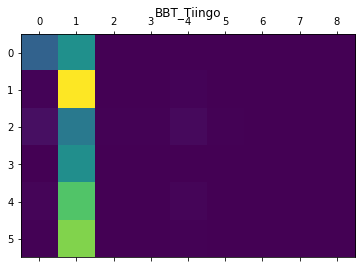

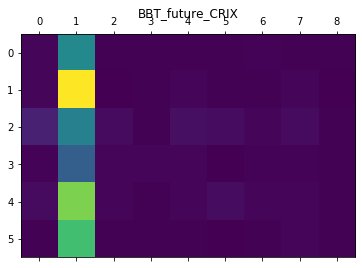

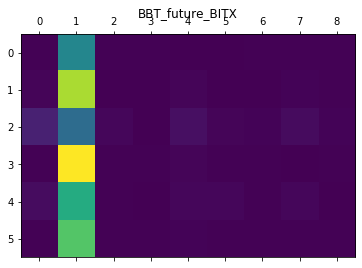

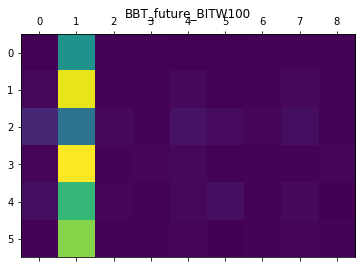

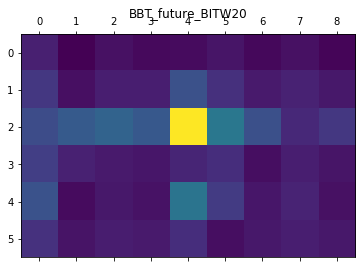

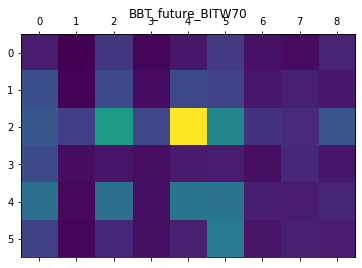

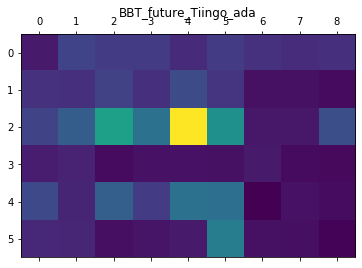

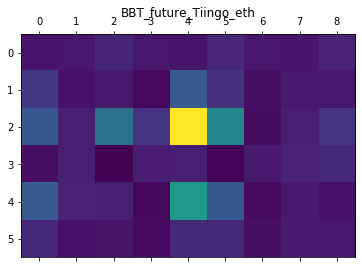

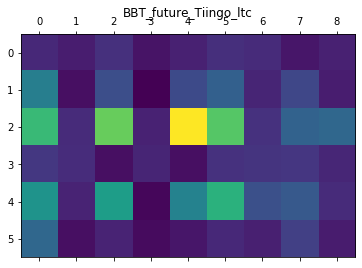

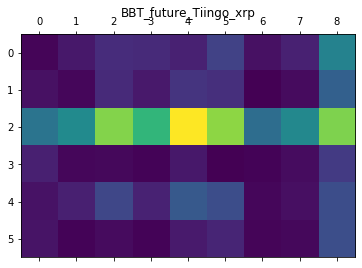

In [319]:
rn='BBT_future_BITW20'

for rn in order:
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    plt.matshow(df.T)
    plt.title(rn)

In [320]:
order

['BBT_Tiingo',
 'BBT_future_CRIX',
 'BBT_future_BITX',
 'BBT_future_BITW100',
 'BBT_future_BITW20',
 'BBT_future_BITW70',
 'BBT_future_Tiingo_ada',
 'BBT_future_Tiingo_eth',
 'BBT_future_Tiingo_ltc',
 'BBT_future_Tiingo_xrp']

BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


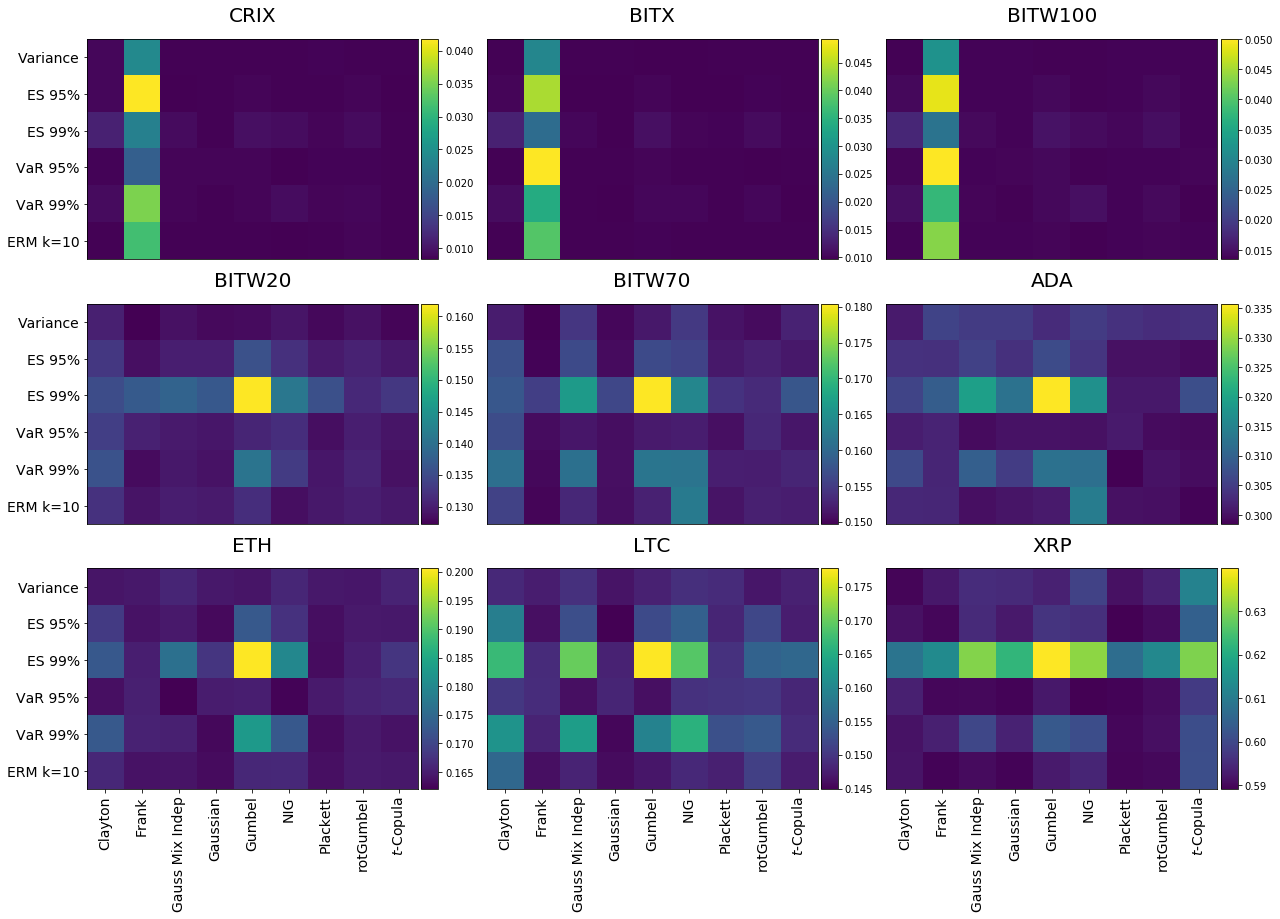

In [325]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

factor = 2.3
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=3, ncols=3)

for i, rn in enumerate(order[1:]):
    print(rn)
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    
    df *=100

    im = ax.flatten()[i].matshow(df.T, interpolation='nearest')

    divider = make_axes_locatable(ax.flatten()[i])

    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.flatten()[i].set_title(new_coin_names[i], fontsize=20)
    ax.flatten()[i].xaxis.set_ticks_position('bottom')

    if i%3 == 0:
        ax.flatten()[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax.flatten()[i].set_yticks([])
    
    if i>=6:
        ax.flatten()[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax.flatten()[i].set_xticks([])

plt.subplots_adjust(wspace=.125, hspace=0.2)

plt.savefig('../../latex/_pics/MSE_other.pdf', transparent=True)

BBT_Tiingo


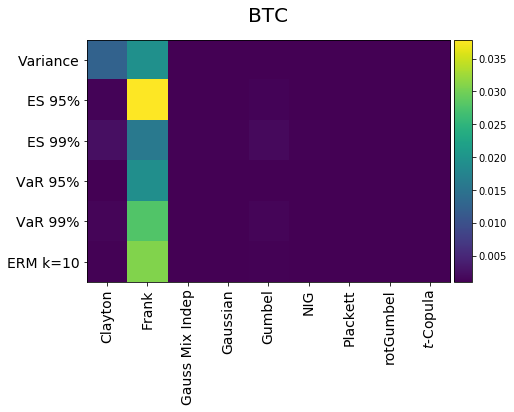

In [310]:
i=0
rn = order[i]
print(rn)
path = 'Rh_MM_MSE_%s.csv'%rn
df = pd.read_csv(path, index_col='Unnamed: 0')
df*=100

fig, ax = plt.subplots(figsize=(9*factor/3,6*factor/3), nrows=1, ncols=1)

im = ax.matshow(df.T, interpolation='nearest')
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+risk_measures_names, fontsize=14)
ax.set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
ax.xaxis.set_ticks_position('bottom')

cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC', fontsize=20)
plt.subplots_adjust(wspace=.125, hspace=0.2)

plt.savefig('../../latex/_pics/MSE_BTC.pdf', transparent=True, bbox_inches = "tight")

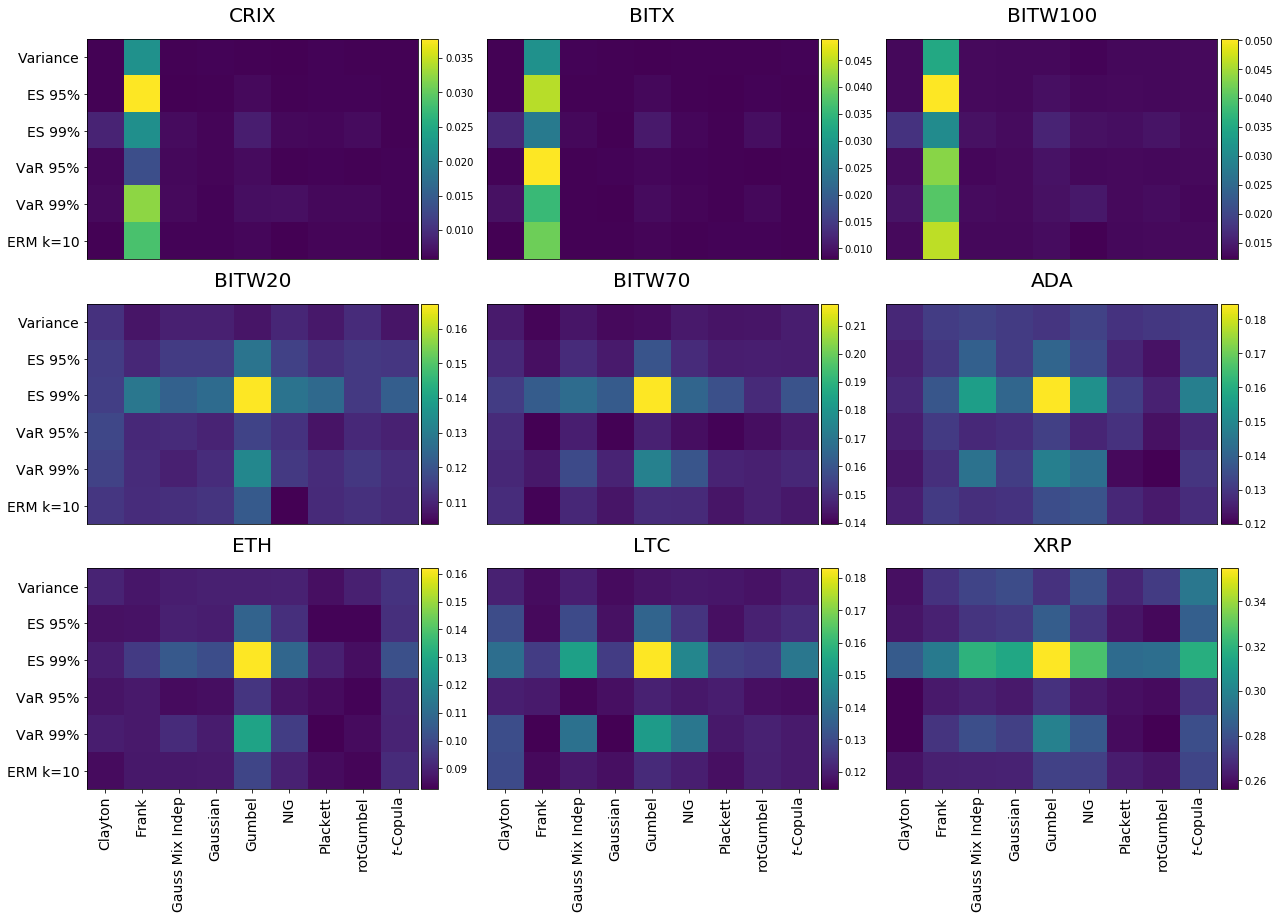

In [327]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

factor = 2.3
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=3, ncols=3)

for i, rn in enumerate(order[1:]):
    path = 'Rh_MM_semiVariance_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    
    df *=100

    im = ax.flatten()[i].matshow(df.T, interpolation='nearest')

    divider = make_axes_locatable(ax.flatten()[i])

    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.flatten()[i].set_title(new_coin_names[i], fontsize=20)
    ax.flatten()[i].xaxis.set_ticks_position('bottom')

    if i%3 == 0:
        ax.flatten()[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax.flatten()[i].set_yticks([])
    
    if i>=6:
        ax.flatten()[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax.flatten()[i].set_xticks([])

plt.subplots_adjust(wspace=.125, hspace=0.2)
plt.savefig('../../latex/_pics/semiLowerVariance_other.pdf', transparent=True)

BBT_Tiingo


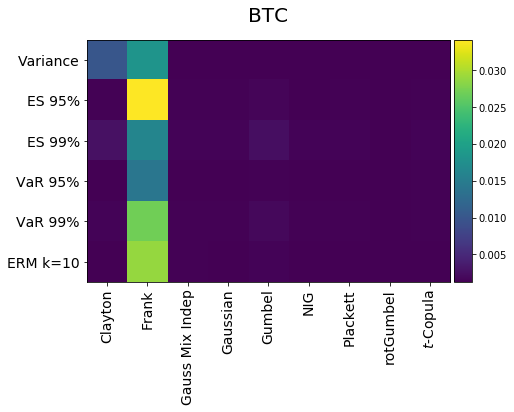

In [311]:
i=0
rn = order[i]
print(rn)
path = 'Rh_MM_semiVariance_%s.csv'%rn
df = pd.read_csv(path, index_col='Unnamed: 0')
df*=100

fig, ax = plt.subplots(figsize=(9*factor/3,6*factor/3), nrows=1, ncols=1)

im = ax.matshow(df.T, interpolation='nearest')
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+risk_measures_names, fontsize=14)
ax.set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
ax.xaxis.set_ticks_position('bottom')

cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC', fontsize=20)
plt.subplots_adjust(wspace=.125, hspace=0.2)

plt.savefig('../../latex/_pics/semiLowerVariance_BTC.pdf', transparent=True, bbox_inches = "tight")